# 09. LFTS Creating State Based and Album Based Final Dataframes

## Contents

## Import libraries and data
    

## Create state based df: df_state_scores

## Create an album+ state based df with album measures: df_alb_scores

## Rerun correlations

## Visualize

## Export dataframes


color = ['skyblue', 'steelblue', 'mediumseagreen', 'chocolate', 'goldenrod', 'darkgoldenrod', 'grey', 'orchid', 'darkblue', 'crimson', 'firebrick', 'k', 'mediumpurple', 'indigo']

## Variables of focus

#### alb_group_st_search_avg and wk1_sales 
(corr coef 0.60, r2 score from linear regression 0.37)

#### REP_avg_score and st_overall_search_avg  (was linear)
(corr coef 0.90, r2 score 0.79)

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
import pylab as pl 

In [2]:
# Display viz in cells

%matplotlib inline

In [3]:
# Define path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
# Import wrangled gsearch_st dataframe

df = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'final_goog_2.csv'), index_col = 0)

In [5]:
# Import goog_state_groups_aggs

df_state = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'goog_state_group_aggs.csv'), index_col = 0)

In [6]:
df.shape

(3672, 93)

In [7]:
df.head()

,state,st_search_score_period_alb,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge,color
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen


In [8]:
df_state.shape

(51, 53)

In [9]:
df.head()

,state,st_search_score_period_alb,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge,color
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both,mediumseagreen


# Review and clean dataframes

## Review overall google df to be turned into album-state grain

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3671
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3672 non-null   object 
 1   st_search_score_period_alb  3672 non-null   int64  
 2   album_event                 3672 non-null   object 
 3   album_id                    3672 non-null   object 
 4   album_release_date          3672 non-null   object 
 5   periods_from_release        3672 non-null   int64  
 6   us_search_avg               3672 non-null   int64  
 7   alb_num_x                   3672 non-null   int64  
 8   tv                          3672 non-null   object 
 9   state_num                   3672 non-null   int64  
 10  alb_group_st_search_avg     3672 non-null   float64
 11  st_overall_search_avg       3672 non-null   float64
 12  st_group_alb_search_avg     3672 non-null   float64
 13  tvflag                      3672 non-n

In [11]:
# Convert us search avg to float

df['us_search_avg'] = df['us_search_avg'].astype(float)

In [12]:
df['us_search_avg'].dtype

dtype('float64')

In [13]:
df.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

In [14]:
df.drop(columns = ['_merge','alb_num_y'], axis=1, inplace=True)

In [15]:
# Column rename

df.rename(columns = { 'album_release_date': 'alb_r_date', 
                        'periods_from_release': 'per_frm_rel', 
                        'alb_num_x': 'alb_num', 
                        'tv':'record_type',
                        'state alb popularity group': 'st_alb_pop_group', 
                        'always_ts':'always_ts_sum', 
                        'originals':'originals_sum', 
                        'taylorsversions':'taylorsversions_sum',
                        'upcoming':'upcoming_sum', 
                        'pop_genre_search_avg':'pop_search_avg', 
                         'country_genre_search_avg': 'country_search_avg',
                          'rock_genre_search_avg':'rock_search_avg', 
                         'alt_genre_search_avg':'alt_search_avg', 
                          'top_alb_normal':'top_alb_n'}, 
                    inplace=True)

In [16]:
df.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'alb_r_date', 'per_frm_rel', 'us_search_avg', 'alb_num', 'record_type',
       'state_num', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'st_alb_pop_group',
       'max_gsearch_score', 'st_top_album', 'top_alb_num', 'min_gsearch_score',
       'st_lowest_album', 'low_alb_num', 'MIDN_avg_score', 'MIDN_sum_not_norm',
       'DEBUT_avg_score', 'DEBUT_sum', 'FEAR_avg_score', 'FEAR_sum',
       'SPEAK_avg_score', 'SPEAK_sum', 'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 'REP_avg_score', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n',
       'country_sum', 'country_norm', 'pop_sum', 'pop_norm

In [17]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       51 non-null     object 
 1   state_num                   51 non-null     int64  
 2   st_overall_search_avg       51 non-null     int64  
 3   state alb popularity group  51 non-null     object 
 4   max_gsearch_score           51 non-null     int64  
 5   st_top_album                51 non-null     object 
 6   top_alb_num                 51 non-null     int64  
 7   min_gsearch_score           51 non-null     int64  
 8   st_lowest_album             51 non-null     object 
 9   low_alb_num                 51 non-null     int64  
 10  MIDN_avg_score              51 non-null     float64
 11  MIDN_sum_not_norm           51 non-null     int64  
 12  DEBUT_avg_score             51 non-null     float64
 13  DEBUT_sum                   51 non-null   

In [18]:
# Update data type to float for average value 

df_state['st_overall_search_avg'] = df_state['st_overall_search_avg'].astype(float)

In [19]:
df_state.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches'],
      dtype='object')

In [20]:
# Column rename

df_state.rename(columns = {'state alb popularity group': 'st_alb_pop_group', 
                        'always_ts':'always_ts_sum', 
                        'originals':'originals_sum', 
                        'taylorsversions':'taylorsversions_sum',
                        'upcoming':'upcoming_sum', 
                        'pop_genre_search_avg':'pop_search_avg', 
                         'country_genre_search_avg': 'country_search_avg',
                        'rock_genre_search_avg':'rock_search_avg', 
                        'alt_genre_search_avg':'alt_search_avg', 
                        'top_alb_normal':'top_alb_n'}, 
                    inplace=True)

In [21]:
df_state.columns

Index(['state', 'state_num', 'st_overall_search_avg', 'st_alb_pop_group',
       'max_gsearch_score', 'st_top_album', 'top_alb_num', 'min_gsearch_score',
       'st_lowest_album', 'low_alb_num', 'MIDN_avg_score', 'MIDN_sum_not_norm',
       'DEBUT_avg_score', 'DEBUT_sum', 'FEAR_avg_score', 'FEAR_sum',
       'SPEAK_avg_score', 'SPEAK_sum', 'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 'REP_avg_score', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n',
       'country_sum', 'country_norm', 'pop_sum', 'pop_norm', 'rock_sum',
       'rock_norm', 'alt_sum', 'alt_norm', 'always_ts_sum', 'originals_sum',
       'taylorsversions_sum', 'upcoming_sum', 'sum_all_searches'],
      dtype='object')

### Split dataframe based on grain

df_state_scores to compare REP_avg_score and st_overall_search_avg

df_alb_scores to compare alb_group_st_search_avg and wk1_sales

## Create df_state to compare state specific
REP_avg_score and st_overall_search_avg

In [22]:
df_state.columns

Index(['state', 'state_num', 'st_overall_search_avg', 'st_alb_pop_group',
       'max_gsearch_score', 'st_top_album', 'top_alb_num', 'min_gsearch_score',
       'st_lowest_album', 'low_alb_num', 'MIDN_avg_score', 'MIDN_sum_not_norm',
       'DEBUT_avg_score', 'DEBUT_sum', 'FEAR_avg_score', 'FEAR_sum',
       'SPEAK_avg_score', 'SPEAK_sum', 'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 'REP_avg_score', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n',
       'country_sum', 'country_norm', 'pop_sum', 'pop_norm', 'rock_sum',
       'rock_norm', 'alt_sum', 'alt_norm', 'always_ts_sum', 'originals_sum',
       'taylorsversions_sum', 'upcoming_sum', 'sum_all_searches'],
      dtype='object')

In [23]:
# Take only numerical values and key metrics
# Wherever there is a normalized value, I prioritize that

df_state_scores = df_state[['state', 'st_overall_search_avg',
                            'top_alb_num', 
                            'st_top_album',
                            'top_alb_num',
                            'max_gsearch_score',
                            'st_lowest_album',
                            'REP_avg_score',
                            'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
                            'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
                            'MIDN_avg_score',  'MIDN_sum_n',
                            'DEBUT_avg_score', 'DEBUT_sum', 
                            'FEAR_avg_score', 'FEAR_sum',
                           'SPEAK_avg_score', 'SPEAK_sum', 
                            'RED_avg_score', 'RED_sum',
                           '1989_avg_score', '1989_sum',
                            'REP_sum',
                           'LOVE_avg_score', 'LOVE_sum', 
                            'FOLK_avg_score', 'FOLK_sum',
                           'EVER_avg_score', 'EVER_sum', 
                            'FEARTV_avg_score', 'FEARTV_sum',
                            'REDTV_avg_score', 'REDTV_sum', 
                            'SPEAKTV_avg_score', 'SPEAKTV_sum',
                            '1989TV_avg_score', '1989TV_sum_n',
                            'country_sum', 'pop_sum', 'rock_sum',  'alt_sum',
                            'state_num', 'st_alb_pop_group'
                           ]]

In [24]:
df_state_scores.head()

,state,st_overall_search_avg,top_alb_num,st_top_album,top_alb_num,max_gsearch_score,st_lowest_album,REP_avg_score,country_norm,pop_norm,...,SPEAKTV_avg_score,SPEAKTV_sum,1989TV_avg_score,1989TV_sum_n,country_sum,pop_sum,rock_sum,alt_sum,state_num,st_alb_pop_group
0,Alabama,52.0,2,FEAR,2,93,DEBUT,65.0,235.000000,287.810,...,20.4,102,48.50,232,705,1439,1025,487,1,Medium search popularity
1,Alaska,46.0,10,FEARTV,10,100,DEBUT,55.6,208.333333,263.560,...,21.4,107,49.75,238,625,1317,848,447,2,Low search popularity
2,Arizona,49.0,5,1989,5,72,DEBUT,62.2,183.000000,282.795,...,19.4,97,52.00,249,549,1413,942,524,3,Low search popularity
3,Arkansas,54.0,5,1989,5,85,DEBUT,63.4,243.333333,299.285,...,25.0,125,56.00,268,730,1496,1061,492,4,Medium search popularity
4,California,46.0,13,SPEAKTV,13,100,DEBUT,61.8,142.666667,279.550,...,41.0,205,53.75,258,428,1397,925,494,5,Low search popularity


In [25]:
df_state_scores.shape

(51, 49)

## Create df_alb_scores to compare album measures

## alb_group_st_search_avg and wk1_sales

In [26]:
df.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'alb_r_date', 'per_frm_rel', 'us_search_avg', 'alb_num', 'record_type',
       'state_num', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'st_alb_pop_group',
       'max_gsearch_score', 'st_top_album', 'top_alb_num', 'min_gsearch_score',
       'st_lowest_album', 'low_alb_num', 'MIDN_avg_score', 'MIDN_sum_not_norm',
       'DEBUT_avg_score', 'DEBUT_sum', 'FEAR_avg_score', 'FEAR_sum',
       'SPEAK_avg_score', 'SPEAK_sum', 'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 'REP_avg_score', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n',
       'country_sum', 'country_norm', 'pop_sum', 'pop_norm

In [27]:
df.head(20)

,state,st_search_score_period_alb,album_event,album_id,alb_r_date,per_frm_rel,us_search_avg,alb_num,record_type,state_num,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69.0,1,original,1,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69.0,1,original,2,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69.0,1,original,3,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69.0,1,original,4,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
4,California,3,Debut,DEBUT,2006-10-24,-2,69.0,1,original,5,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
5,Colorado,7,Debut,DEBUT,2006-10-24,-2,69.0,1,original,6,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
6,Connecticut,0,Debut,DEBUT,2006-10-24,-2,69.0,1,original,7,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
7,Delaware,0,Debut,DEBUT,2006-10-24,-2,69.0,1,original,8,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
8,District of Columbia,0,Debut,DEBUT,2006-10-24,-2,69.0,1,original,9,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
9,Florida,6,Debut,DEBUT,2006-10-24,-2,69.0,1,original,10,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen


In [28]:
df.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'alb_r_date', 'per_frm_rel', 'us_search_avg', 'alb_num', 'record_type',
       'state_num', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'st_alb_pop_group',
       'max_gsearch_score', 'st_top_album', 'top_alb_num', 'min_gsearch_score',
       'st_lowest_album', 'low_alb_num', 'MIDN_avg_score', 'MIDN_sum_not_norm',
       'DEBUT_avg_score', 'DEBUT_sum', 'FEAR_avg_score', 'FEAR_sum',
       'SPEAK_avg_score', 'SPEAK_sum', 'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 'REP_avg_score', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n',
       'country_sum', 'country_norm', 'pop_sum', 'pop_norm

In [29]:
# Add unique id to help with grouping

df['alb_state_key'] = df['album_id'] + ', ' + df['state']

In [30]:
df.shape

(3672, 92)

In [31]:
df.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'alb_r_date', 'per_frm_rel', 'us_search_avg', 'alb_num', 'record_type',
       'state_num', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'st_alb_pop_group',
       'max_gsearch_score', 'st_top_album', 'top_alb_num', 'min_gsearch_score',
       'st_lowest_album', 'low_alb_num', 'MIDN_avg_score', 'MIDN_sum_not_norm',
       'DEBUT_avg_score', 'DEBUT_sum', 'FEAR_avg_score', 'FEAR_sum',
       'SPEAK_avg_score', 'SPEAK_sum', 'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 'REP_avg_score', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n',
       'country_sum', 'country_norm', 'pop_sum', 'pop_norm

In [32]:
# Create dataframe that has the grain album-state
# First, select values only relevant to this grain
df_alb_scores = df[['alb_state_key', 'alb_num','album_id', 
                    'state', 'state_num','st_group_alb_search_avg', 
                    'alb_group_st_search_avg',
                    'alb_r_date', 'record_type',
                    'tvflag', 'st_alb_pop_group',
                    'album_event', 'alb_track_cnt', 
                    'wk1_sales', 'tot_alb_plays', 'top_s_cnt', 'tvflag',
                    'alb_streams_norm', 
                    'top_alb_count', 
                    'top_alb_n', 'days_sr', 
                    'alb_ann_day', 'alb_ann_yr', 
                    'alb_r_day', 'alb_r_yr', 
                    'acou_m','dance_m', 'ener_m', 
                    'instru_m', 'live_m', 'loud_m', 
                    'speech_m','temp_m', 'val_m', 'dur_m', 
                    'color']]

In [33]:
pd.set_option('display.max_rows', None)

In [34]:
df_alb_scores.head(100)

,alb_state_key,alb_num,album_id,state,state_num,st_group_alb_search_avg,alb_group_st_search_avg,alb_r_date,record_type,tvflag,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,"DEBUT, Alabama",1,DEBUT,Alabama,1,21.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
1,"DEBUT, Alaska",1,DEBUT,Alaska,2,16.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
2,"DEBUT, Arizona",1,DEBUT,Arizona,3,15.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
3,"DEBUT, Arkansas",1,DEBUT,Arkansas,4,30.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
4,"DEBUT, California",1,DEBUT,California,5,6.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
5,"DEBUT, Colorado",1,DEBUT,Colorado,6,16.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
6,"DEBUT, Connecticut",1,DEBUT,Connecticut,7,9.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
7,"DEBUT, Delaware",1,DEBUT,Delaware,8,17.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
8,"DEBUT, District of Columbia",1,DEBUT,District of Columbia,9,4.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen
9,"DEBUT, Florida",1,DEBUT,Florida,10,12.0,19.0,2006-10-24,original,False,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,mediumseagreen


In [35]:
df_alb_scores.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt', 'tvflag',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color'],
      dtype='object')

In [36]:
df_alb_scores.shape

(3672, 36)

In [37]:
df_alb_scores['alb_state_key'].value_counts(dropna=False)

alb_state_key
MIDN, North Dakota               8
MIDN, Oklahoma                   8
MIDN, Massachusetts              8
MIDN, Michigan                   8
MIDN, Mississippi                8
MIDN, Missouri                   8
MIDN, Montana                    8
MIDN, Nebraska                   8
MIDN, Nevada                     8
MIDN, New Hampshire              8
MIDN, New Jersey                 8
MIDN, New Mexico                 8
MIDN, New York                   8
MIDN, North Carolina             8
MIDN, Ohio                       8
MIDN, Oregon                     8
MIDN, Maine                      8
MIDN, Pennsylvania               8
MIDN, Rhode Island               8
MIDN, South Carolina             8
MIDN, South Dakota               8
MIDN, Tennessee                  8
MIDN, Texas                      8
MIDN, Utah                       8
MIDN, Vermont                    8
MIDN, Virginia                   8
MIDN, Washington                 8
MIDN, West Virginia              8
MIDN, 

In [38]:
df_alb_scores.shape

(3672, 36)

In [39]:
# Use groupby to keep all observations for each album, with each states info attached.
# This will collapse repeated information based on different periods within albums

df_alb_scores = df_alb_scores.groupby('alb_state_key').first().reset_index()

In [40]:
df_alb_scores = df_alb_scores.sort_values(by='alb_state_key')

In [41]:
df_alb_scores.head(50)

,alb_state_key,alb_num,album_id,state,state_num,st_group_alb_search_avg,alb_group_st_search_avg,alb_r_date,record_type,tvflag,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,"1989, Alabama",5,1989,Alabama,1,67.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
1,"1989, Alaska",5,1989,Alaska,2,52.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
2,"1989, Arizona",5,1989,Arizona,3,62.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
3,"1989, Arkansas",5,1989,Arkansas,4,72.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
4,"1989, California",5,1989,California,5,63.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
5,"1989, Colorado",5,1989,Colorado,6,63.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
6,"1989, Connecticut",5,1989,Connecticut,7,78.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
7,"1989, Delaware",5,1989,Delaware,8,73.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
8,"1989, District of Columbia",5,1989,District of Columbia,9,79.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
9,"1989, Florida",5,1989,Florida,10,54.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue


In [42]:
df_alb_scores.shape

(714, 36)

In [43]:
df_alb_scores.dtypes

alb_state_key               object
alb_num                      int64
album_id                    object
state                       object
state_num                    int64
st_group_alb_search_avg    float64
alb_group_st_search_avg    float64
alb_r_date                  object
record_type                 object
tvflag                        bool
st_alb_pop_group            object
album_event                 object
alb_track_cnt              float64
wk1_sales                  float64
tot_alb_plays              float64
top_s_cnt                  float64
tvflag                        bool
alb_streams_norm           float64
top_alb_count              float64
top_alb_n                  float64
days_sr                    float64
alb_ann_day                float64
alb_ann_yr                 float64
alb_r_day                  float64
alb_r_yr                   float64
acou_m                     float64
dance_m                    float64
ener_m                     float64
instru_m            

In [44]:
# Convert some columns back to integers

df_alb_scores[['alb_track_cnt', 'top_s_cnt', 'top_alb_count', 'top_alb_n', 'days_sr', 'alb_ann_day',
               'alb_ann_yr', 'alb_r_day', 'alb_r_yr']] = df_alb_scores[['alb_track_cnt', 'top_s_cnt', 'top_alb_count', 'top_alb_n', 'days_sr', 'alb_ann_day',
               'alb_ann_yr', 'alb_r_day', 'alb_r_yr']].astype(int)

In [45]:
# Check types again

df_alb_scores.dtypes

alb_state_key               object
alb_num                      int64
album_id                    object
state                       object
state_num                    int64
st_group_alb_search_avg    float64
alb_group_st_search_avg    float64
alb_r_date                  object
record_type                 object
tvflag                        bool
st_alb_pop_group            object
album_event                 object
alb_track_cnt                int32
wk1_sales                  float64
tot_alb_plays              float64
top_s_cnt                    int32
tvflag                        bool
alb_streams_norm           float64
top_alb_count                int32
top_alb_n                    int32
days_sr                      int32
alb_ann_day                  int32
alb_ann_yr                   int32
alb_r_day                    int32
alb_r_yr                     int32
acou_m                     float64
dance_m                    float64
ener_m                     float64
instru_m            

In [46]:
# Define if needed! 

color = ['skyblue', 'steelblue', 'mediumseagreen', 'chocolate', 'goldenrod', 'darkgoldenrod', 'grey', 'orchid', 'darkblue', 'crimson', 'firebrick', 'k', 'mediumpurple', 'indigo']

## Rerun correlations with df_alb_scores

In [48]:
df_alb_scores.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt', 'tvflag',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color'],
      dtype='object')

In [64]:
df_alb_scores_num = df_alb_scores[['alb_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt', 'tvflag',
       'alb_streams_norm', 'top_alb_count', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m']]

In [65]:
df_alb_scores_num.shape

(714, 26)

In [66]:
df_alb_scores_num.corr()

,alb_num,st_group_alb_search_avg,alb_group_st_search_avg,alb_track_cnt,wk1_sales,tot_alb_plays,top_s_cnt,tvflag,tvflag,alb_streams_norm,...,acou_m,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m
alb_num,1.000000,0.017998,0.023395,0.554071,0.046707,0.164680,1.000000,0.706018,0.706018,0.567630,...,0.119272,-0.035013,-0.257325,0.166803,-0.004415,-0.352816,0.204674,0.062139,-0.248571,0.053689
st_group_alb_search_avg,0.017998,1.000000,0.763023,0.081915,0.460120,0.232432,0.017998,-0.145791,-0.145791,0.059615,...,0.026144,0.358474,-0.082464,0.186171,-0.342029,-0.218542,0.298757,-0.065283,0.022723,-0.079852
alb_group_st_search_avg,0.023395,0.763023,1.000000,0.105481,0.606658,0.304827,0.023395,-0.190867,-0.190867,0.081063,...,0.034904,0.464350,-0.107761,0.246353,-0.439275,-0.283362,0.389113,-0.078857,0.026542,-0.096180
alb_track_cnt,0.554071,0.081915,0.105481,1.000000,-0.110127,0.011324,0.554071,0.733263,0.733263,0.187246,...,-0.283731,-0.113410,-0.014262,-0.123545,0.022021,0.086311,-0.286177,0.110597,-0.018884,0.242810
wk1_sales,0.046707,0.460120,0.606658,-0.110127,1.000000,0.040506,0.046707,-0.198144,-0.198144,0.388202,...,-0.311140,0.494859,0.126449,-0.052065,-0.179237,0.007179,0.525958,-0.115412,-0.136538,-0.151603
tot_alb_plays,0.164680,0.232432,0.304827,0.011324,0.040506,1.000000,0.164680,-0.288068,-0.288068,-0.196062,...,0.337676,0.609981,-0.697014,0.301566,-0.117733,-0.633471,0.584324,-0.314418,-0.320171,-0.469326
top_s_cnt,1.000000,0.017998,0.023395,0.554071,0.046707,0.164680,1.000000,0.706018,0.706018,0.567630,...,0.119272,-0.035013,-0.257325,0.166803,-0.004415,-0.352816,0.204674,0.062139,-0.248571,0.053689
tvflag,0.706018,-0.145791,-0.190867,0.733263,-0.198144,-0.288068,0.706018,1.000000,1.000000,0.476028,...,-0.348628,-0.335064,0.272262,-0.342635,0.211454,0.295591,-0.281252,0.353879,0.105696,0.355842
tvflag,0.706018,-0.145791,-0.190867,0.733263,-0.198144,-0.288068,0.706018,1.000000,1.000000,0.476028,...,-0.348628,-0.335064,0.272262,-0.342635,0.211454,0.295591,-0.281252,0.353879,0.105696,0.355842
alb_streams_norm,0.567630,0.059615,0.081063,0.187246,0.388202,-0.196062,0.567630,0.476028,0.476028,1.000000,...,-0.146915,0.073878,0.155193,0.001555,-0.072696,-0.034332,0.116756,-0.116318,-0.144632,-0.159243


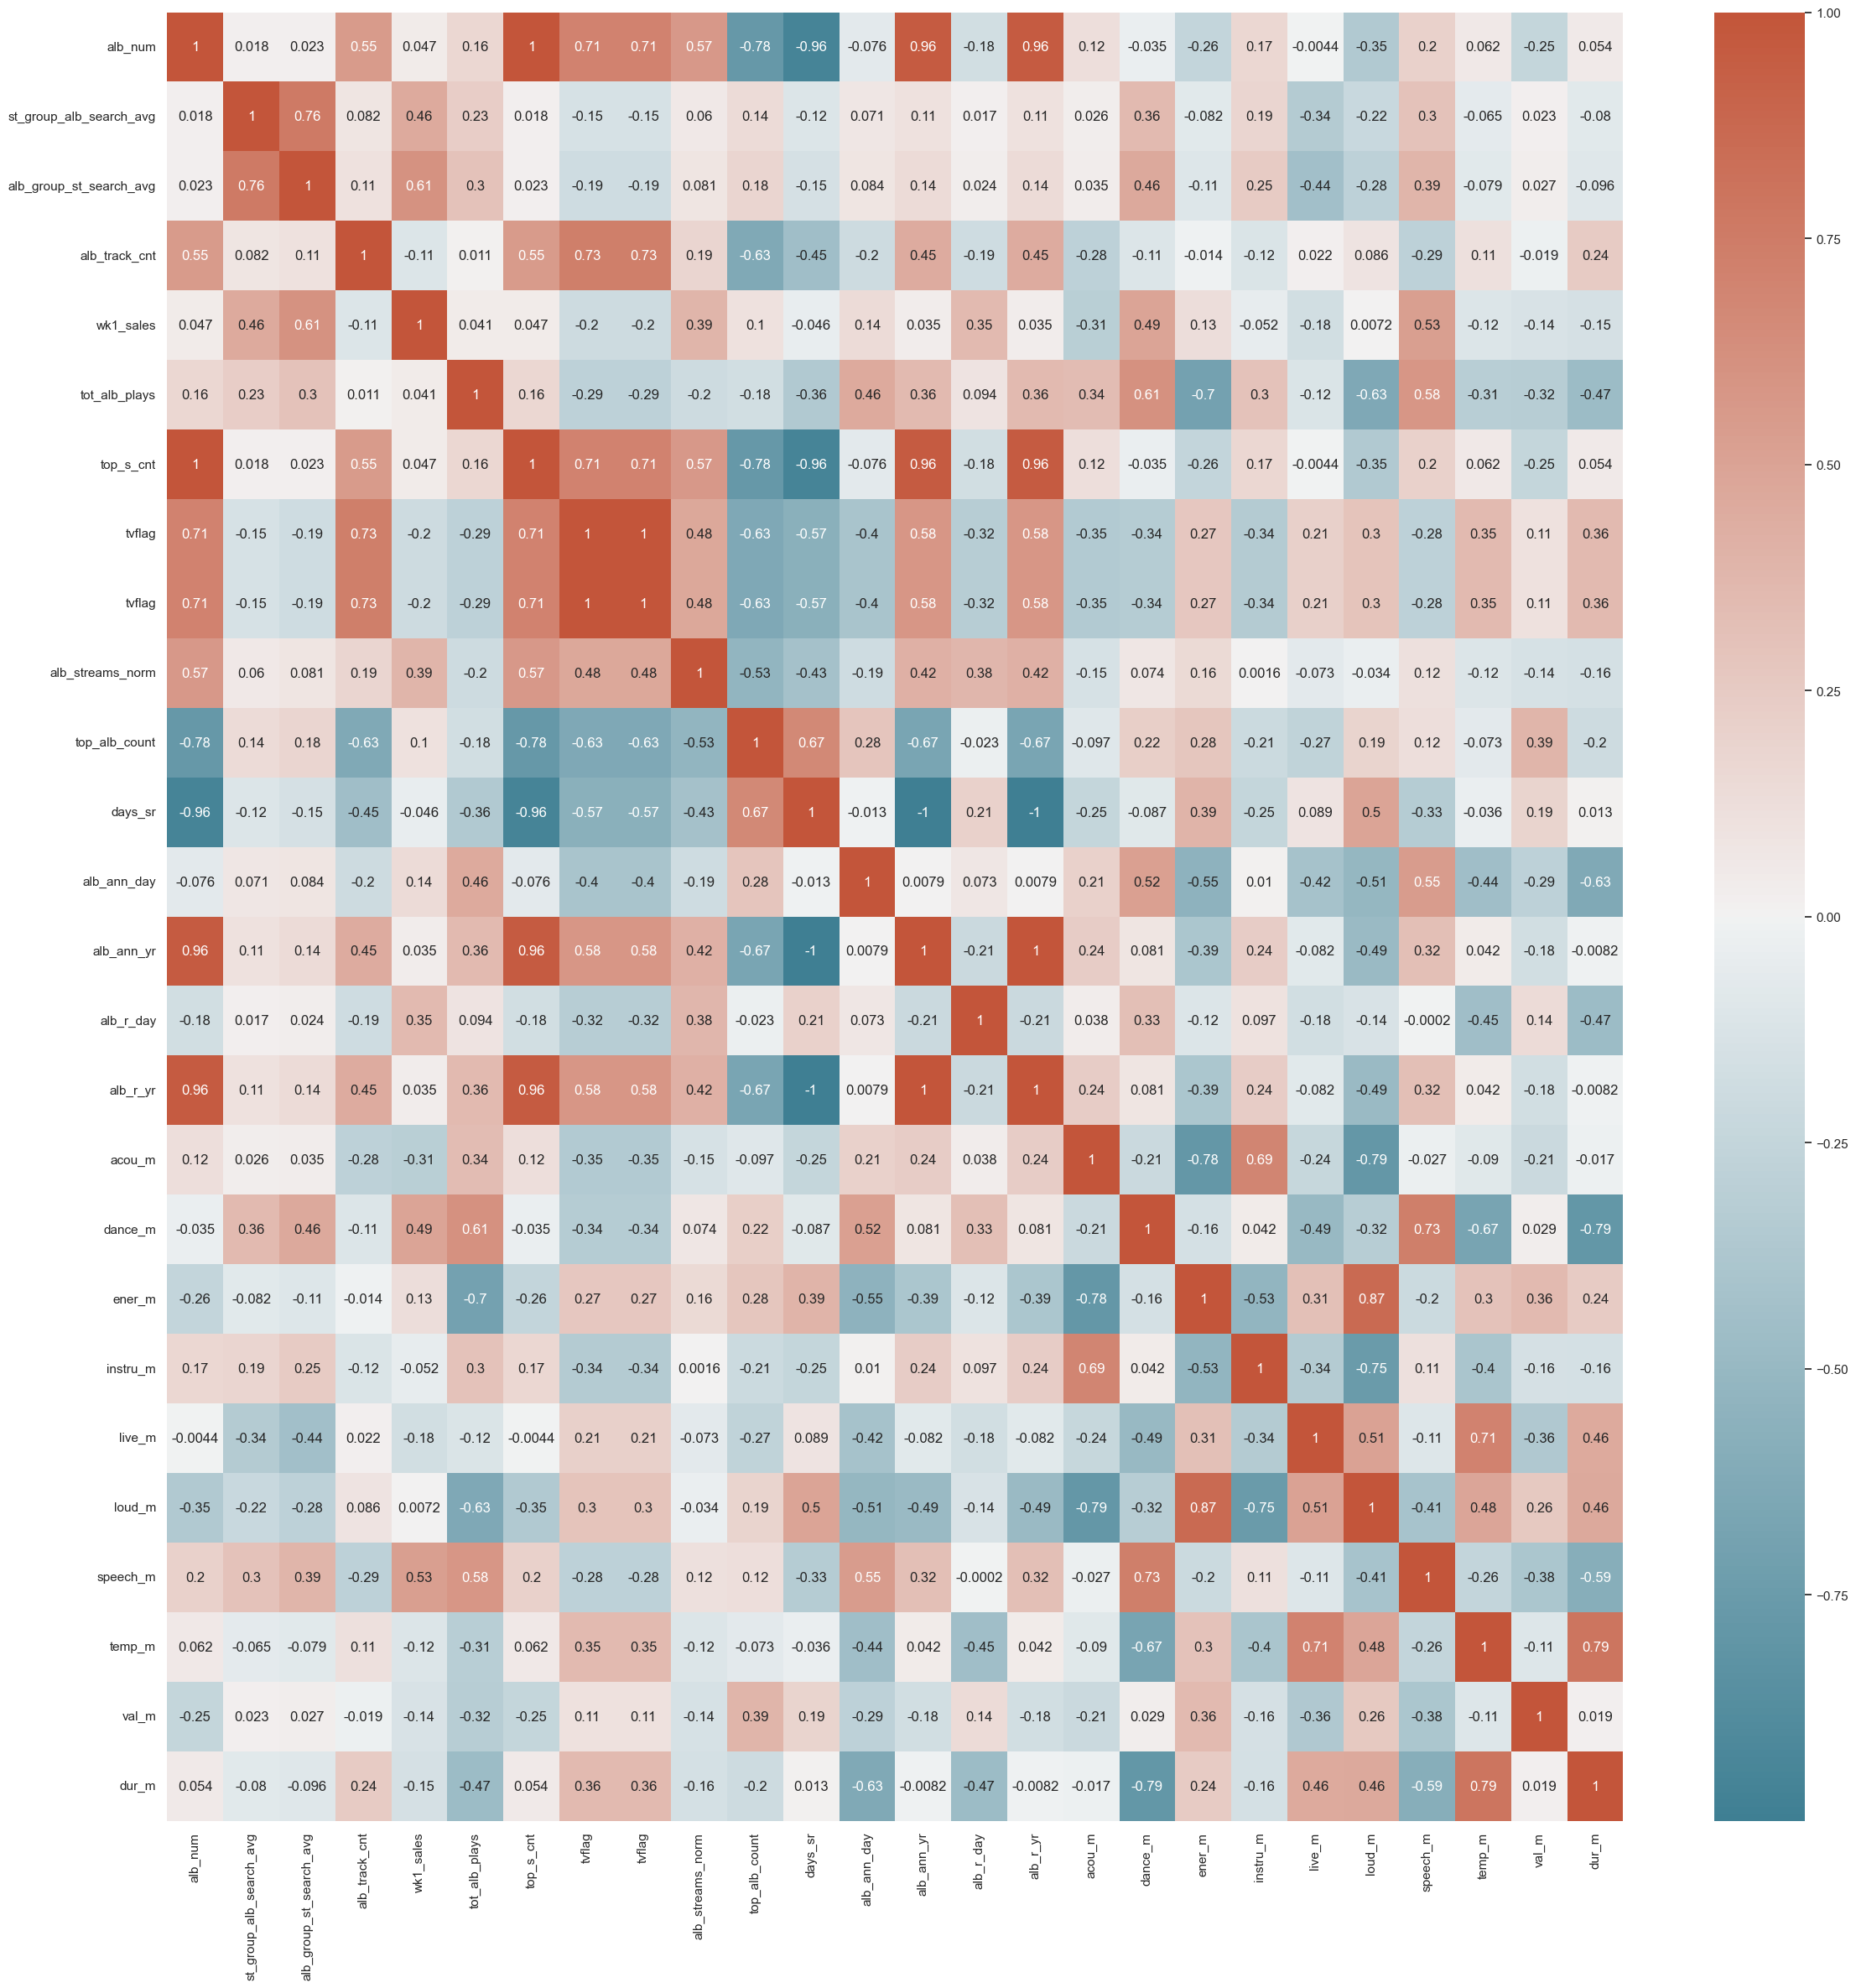

In [67]:
# Create heatmap of album df

f,ax = plt.subplots(figsize=(28,28))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

df_alb_scores_heatmap = sns.heatmap(df_alb_scores_num.corr(), annot = True, cmap=cmap, ax = ax) 

In [96]:
# Save figure

df_alb_scores_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'final_alb_scores_heatmap.png'))

In [69]:
df_alb_scores.head(100)

,alb_state_key,alb_num,album_id,state,state_num,st_group_alb_search_avg,alb_group_st_search_avg,alb_r_date,record_type,tvflag,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,"1989, Alabama",5,1989,Alabama,1,67.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
1,"1989, Alaska",5,1989,Alaska,2,52.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
2,"1989, Arizona",5,1989,Arizona,3,62.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
3,"1989, Arkansas",5,1989,Arkansas,4,72.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
4,"1989, California",5,1989,California,5,63.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
5,"1989, Colorado",5,1989,Colorado,6,63.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
6,"1989, Connecticut",5,1989,Connecticut,7,78.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
7,"1989, Delaware",5,1989,Delaware,8,73.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
8,"1989, District of Columbia",5,1989,District of Columbia,9,79.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue
9,"1989, Florida",5,1989,Florida,10,54.0,67.0,2014-10-27,original,False,...,0.62,0.7100,0.00000,0.1000,-5.920,0.0500,120.9800,0.490,230733.0,skyblue


## Rerun correlations with df_state_scores

In [70]:
df_state_scores.head(10)

,state,st_overall_search_avg,top_alb_num,st_top_album,top_alb_num,max_gsearch_score,st_lowest_album,REP_avg_score,country_norm,pop_norm,...,SPEAKTV_avg_score,SPEAKTV_sum,1989TV_avg_score,1989TV_sum_n,country_sum,pop_sum,rock_sum,alt_sum,state_num,st_alb_pop_group
0,Alabama,52.0,2,FEAR,2,93,DEBUT,65.0,235.000000,287.810,...,20.4,102,48.50,232,705,1439,1025,487,1,Medium search popularity
1,Alaska,46.0,10,FEARTV,10,100,DEBUT,55.6,208.333333,263.560,...,21.4,107,49.75,238,625,1317,848,447,2,Low search popularity
2,Arizona,49.0,5,1989,5,72,DEBUT,62.2,183.000000,282.795,...,19.4,97,52.00,249,549,1413,942,524,3,Low search popularity
3,Arkansas,54.0,5,1989,5,85,DEBUT,63.4,243.333333,299.285,...,25.0,125,56.00,268,730,1496,1061,492,4,Medium search popularity
4,California,46.0,13,SPEAKTV,13,100,DEBUT,61.8,142.666667,279.550,...,41.0,205,53.75,258,428,1397,925,494,5,Low search popularity
5,Colorado,54.0,13,SPEAKTV,13,100,DEBUT,67.0,192.666667,314.655,...,44.4,222,66.75,320,578,1573,1040,608,6,Medium search popularity
6,Connecticut,63.0,5,1989,5,90,DEBUT,68.8,251.333333,346.565,...,27.2,136,64.00,307,754,1732,1233,720,7,High search popularity
7,Delaware,54.0,3,SPEAK,3,100,DEBUT,55.8,216.666667,296.435,...,24.6,123,59.75,286,650,1482,1169,500,8,Medium search popularity
8,District of Columbia,68.0,6,REP,6,100,DEBUT,89.8,211.000000,403.845,...,37.6,188,62.00,297,633,2019,1197,871,9,High search popularity
9,Florida,41.0,5,1989,5,62,DEBUT,51.2,151.333333,245.315,...,23.0,115,51.50,247,454,1226,818,403,10,Low search popularity


In [71]:
df_state_scores.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num', 'max_gsearch_score', 'st_lowest_album', 'REP_avg_score',
       'country_norm', 'pop_norm', 'rock_norm', 'alt_norm', 'always_ts_sum',
       'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group'],
      dtype='object')

In [83]:
df_state_scores_num = df_state_scores[['st_overall_search_avg', 'top_alb_num',
                                'max_gsearch_score', 'REP_avg_score',
                               'country_norm', 'pop_norm', 'rock_norm', 'alt_norm', 
                                 'always_ts_sum','originals_sum', 'taylorsversions_sum', 'upcoming_sum',
                                'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
                                'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
                                'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
                                'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
                                'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
                                'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
                                '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
                                'rock_sum', 'alt_sum', 'state_num']]

In [84]:
df_state_scores_num.columns

Index(['st_overall_search_avg', 'top_alb_num', 'top_alb_num',
       'max_gsearch_score', 'REP_avg_score', 'country_norm', 'pop_norm',
       'rock_norm', 'alt_norm', 'always_ts_sum', 'originals_sum',
       'taylorsversions_sum', 'upcoming_sum', 'MIDN_avg_score', 'MIDN_sum_n',
       'DEBUT_avg_score', 'DEBUT_sum', 'FEAR_avg_score', 'FEAR_sum',
       'SPEAK_avg_score', 'SPEAK_sum', 'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score', '1989TV_sum_n',
       'country_sum', 'pop_sum', 'rock_sum', 'alt_sum', 'state_num'],
      dtype='object')

In [85]:
df_state_scores_num.shape

(51, 45)

In [86]:
df_state_scores_num_1 = df_state_scores_num[['st_overall_search_avg', 'REP_avg_score', 'top_alb_num', 
       'max_gsearch_score', 'country_norm', 'pop_norm',
       'rock_norm', 'alt_norm', 'always_ts_sum', 'originals_sum',
       'taylorsversions_sum', 'upcoming_sum', 'state_num']]

In [87]:
df_state_scores_num_1.corr()

,st_overall_search_avg,REP_avg_score,top_alb_num,top_alb_num,max_gsearch_score,country_norm,pop_norm,rock_norm,alt_norm,always_ts_sum,originals_sum,taylorsversions_sum,upcoming_sum,state_num
st_overall_search_avg,1.000000,0.896139,-0.023544,-0.023544,0.657140,0.798081,0.972521,0.959723,0.838430,0.900820,0.789725,0.880157,0.799539,0.144612
REP_avg_score,0.896139,1.000000,-0.021094,-0.021094,0.594774,0.651644,0.934494,0.803310,0.756947,0.837563,0.631488,0.777342,0.836249,0.069708
top_alb_num,-0.023544,-0.021094,1.000000,1.000000,0.204980,-0.304167,0.051927,-0.040442,0.165290,0.108076,-0.367359,0.357205,-0.226297,-0.135363
top_alb_num,-0.023544,-0.021094,1.000000,1.000000,0.204980,-0.304167,0.051927,-0.040442,0.165290,0.108076,-0.367359,0.357205,-0.226297,-0.135363
max_gsearch_score,0.657140,0.594774,0.204980,0.204980,1.000000,0.567389,0.659380,0.660593,0.454396,0.520015,0.542914,0.652644,0.543530,0.012411
country_norm,0.798081,0.651644,-0.304167,-0.304167,0.567389,1.000000,0.694364,0.793671,0.434767,0.528271,0.882066,0.544894,0.857609,0.215756
pop_norm,0.972521,0.934494,0.051927,0.051927,0.659380,0.694364,1.000000,0.903770,0.842720,0.910277,0.703902,0.902103,0.763357,0.107242
rock_norm,0.959723,0.803310,-0.040442,-0.040442,0.660593,0.793671,0.903770,1.000000,0.726343,0.790432,0.866071,0.819051,0.740713,0.149875
alt_norm,0.838430,0.756947,0.165290,0.165290,0.454396,0.434767,0.842720,0.726343,1.000000,0.981997,0.387512,0.872972,0.494387,0.109202
always_ts_sum,0.900820,0.837563,0.108076,0.108076,0.520015,0.528271,0.910277,0.790432,0.981997,1.000000,0.477898,0.895781,0.599307,0.118148


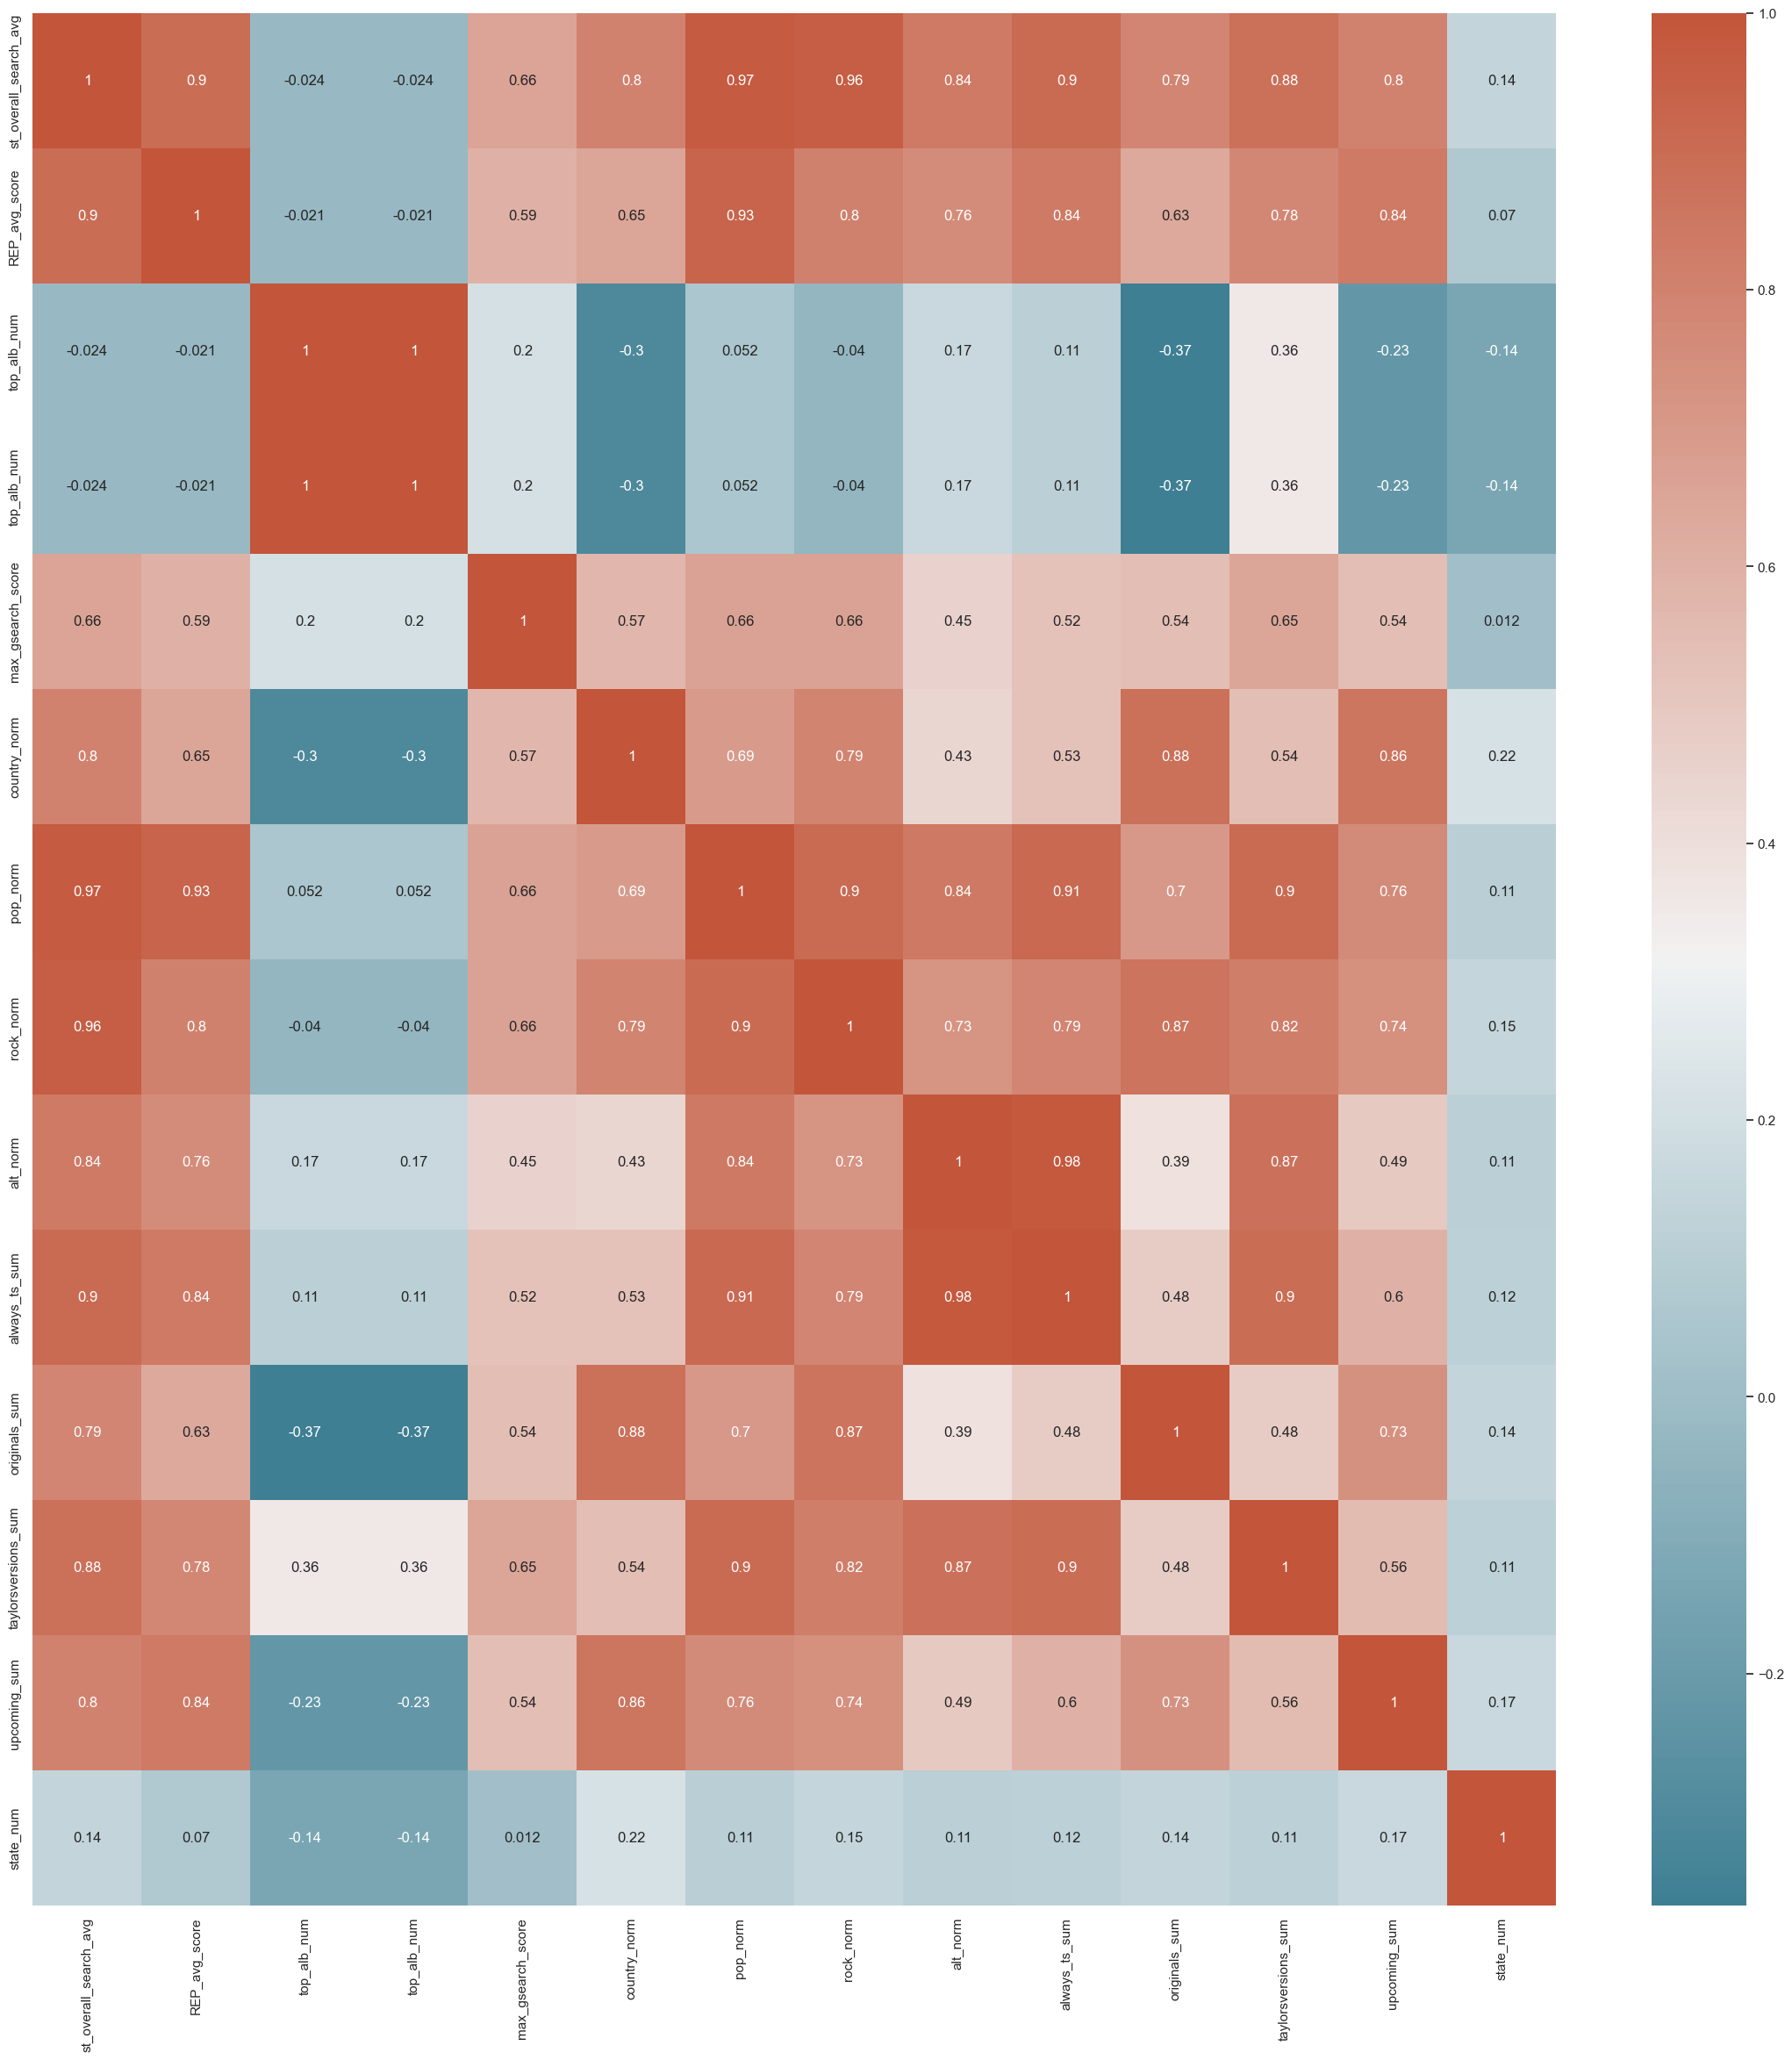

In [101]:
# Create heatmap of state num 1 values

f,ax = plt.subplots(figsize=(28,28))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

df_state_scores_num_1_heatmap = sns.heatmap(df_state_scores_num_1.corr(), annot = True, cmap=cmap, ax = ax) 

In [102]:
# Save figure

df_state_scores_num_1_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'df_state_scores_num_1_heatmap.png'))

In [92]:
df_state_scores_num_2 = df_state_scores_num[['st_overall_search_avg',
                                                 'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
                                               'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
                                               'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_avg_score','REP_sum',
                                               'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
                                               'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
                                               'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
                                               '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
                                               'rock_sum', 'alt_sum']]

In [94]:
final_state_scores_corr_matrix = df_state_scores_num_2.corr()

In [95]:
final_state_scores_corr_matrix

,st_overall_search_avg,MIDN_avg_score,MIDN_sum_n,DEBUT_avg_score,DEBUT_sum,FEAR_avg_score,FEAR_sum,SPEAK_avg_score,SPEAK_sum,RED_avg_score,...,REDTV_avg_score,REDTV_sum,SPEAKTV_avg_score,SPEAKTV_sum,1989TV_avg_score,1989TV_sum_n,country_sum,pop_sum,rock_sum,alt_sum
st_overall_search_avg,1.000000,0.886478,0.886728,0.359589,0.359589,0.478579,0.478579,0.735288,0.735288,0.805148,...,0.854815,0.854815,0.493831,0.493831,0.659639,0.659741,0.798081,0.972562,0.959723,0.838430
MIDN_avg_score,0.886478,1.000000,0.999990,0.096578,0.096578,0.111730,0.111730,0.431088,0.431088,0.552900,...,0.958733,0.958733,0.441449,0.441449,0.518614,0.518845,0.519653,0.909931,0.781409,0.913155
MIDN_sum_n,0.886728,0.999990,1.000000,0.096762,0.096762,0.111949,0.111949,0.431650,0.431650,0.553586,...,0.958791,0.958791,0.440957,0.440957,0.518341,0.518567,0.520246,0.910005,0.781754,0.913069
DEBUT_avg_score,0.359589,0.096578,0.096762,1.000000,1.000000,0.657520,0.657520,0.439276,0.439276,0.464580,...,0.046201,0.046201,0.098546,0.098546,0.167768,0.167907,0.741343,0.252634,0.364029,-0.010656
DEBUT_sum,0.359589,0.096578,0.096762,1.000000,1.000000,0.657520,0.657520,0.439276,0.439276,0.464580,...,0.046201,0.046201,0.098546,0.098546,0.167768,0.167907,0.741343,0.252634,0.364029,-0.010656
FEAR_avg_score,0.478579,0.111730,0.111949,0.657520,0.657520,1.000000,1.000000,0.765076,0.765076,0.584020,...,0.054302,0.054302,0.223570,0.223570,0.423827,0.423464,0.848093,0.369007,0.558698,0.005572
FEAR_sum,0.478579,0.111730,0.111949,0.657520,0.657520,1.000000,1.000000,0.765076,0.765076,0.584020,...,0.054302,0.054302,0.223570,0.223570,0.423827,0.423464,0.848093,0.369007,0.558698,0.005572
SPEAK_avg_score,0.735288,0.431088,0.431650,0.439276,0.439276,0.765076,0.765076,1.000000,1.000000,0.823246,...,0.381878,0.381878,0.214090,0.214090,0.482407,0.482326,0.791732,0.644155,0.835794,0.364923
SPEAK_sum,0.735288,0.431088,0.431650,0.439276,0.439276,0.765076,0.765076,1.000000,1.000000,0.823246,...,0.381878,0.381878,0.214090,0.214090,0.482407,0.482326,0.791732,0.644155,0.835794,0.364923
RED_avg_score,0.805148,0.552900,0.553586,0.464580,0.464580,0.584020,0.584020,0.823246,0.823246,1.000000,...,0.516954,0.516954,0.204888,0.204888,0.437637,0.437830,0.769080,0.712290,0.876433,0.524919


final_state_scores_corr_matrix saved as csv

## Plan to use this corr matrix as a decision tree

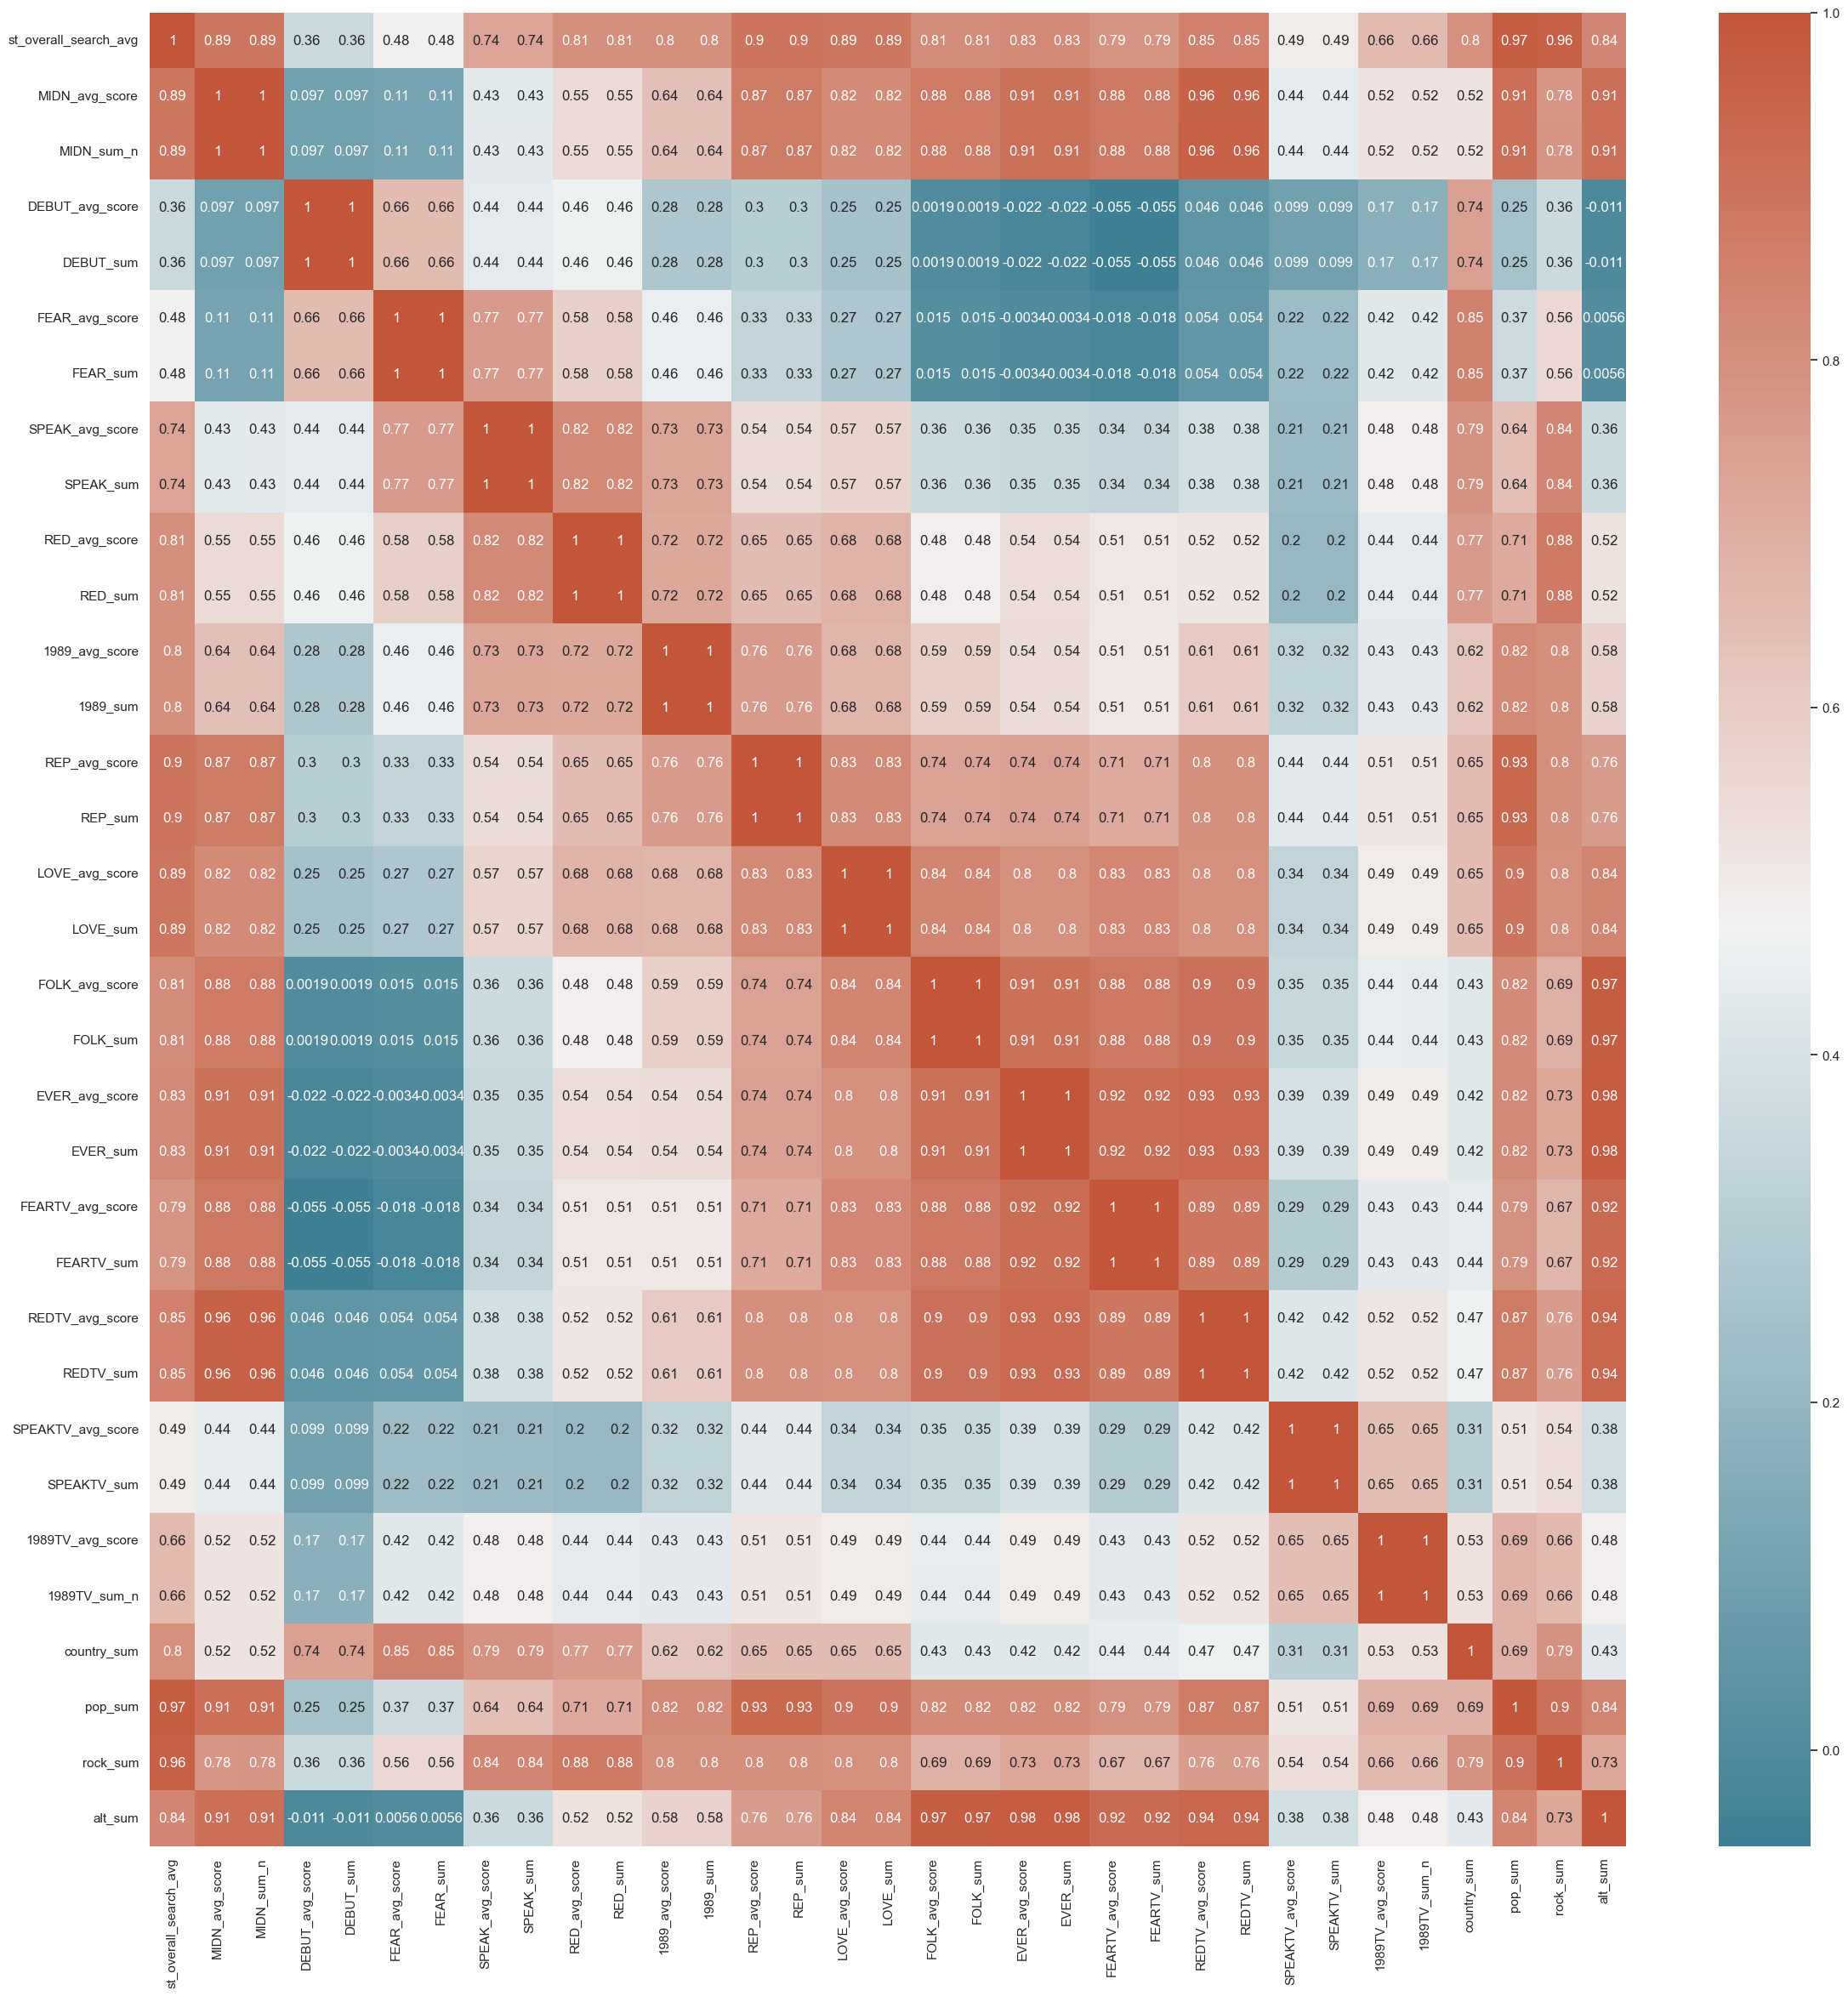

In [99]:
# Create heatmap of state num 2 values

f,ax = plt.subplots(figsize=(28,28))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

df_state_scores_num_2_heatmap = sns.heatmap(df_state_scores_num_2.corr(), annot = True, cmap=cmap, ax = ax) 

### There are many relationships above that are not continuous variables but that I want to explore further

In [100]:
# Save figure

df_state_scores_num_2_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'df_state_scores_num_2_heatmap.png'))

# Visualize both linear and K-means relationships

#### alb_group_st_search_avg and wk1_sales 
(corr coef 0.60, r2 score from linear regression 0.37)

#### REP_avg_score and st_overall_search_avg  (was linear)
(corr coef 0.90, r2 score 0.79)

<Figure size 1200x900 with 0 Axes>

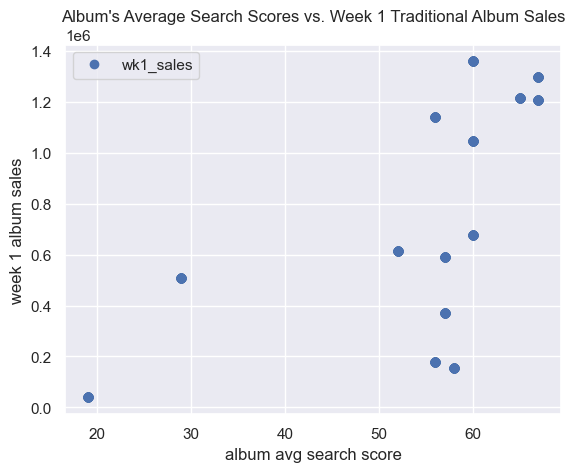

In [103]:
plt.figure(figsize = (12, 9))

alb_group_avg_wk1_sales_scat = plt
df_alb_scores.plot(x = 'alb_group_st_search_avg', y='wk1_sales',style='o') 
alb_group_avg_wk1_sales_scat.title("Album's Average Search Scores vs. Week 1 Traditional Album Sales")  
alb_group_avg_wk1_sales_scat.xlabel("album avg search score")  
alb_group_avg_wk1_sales_scat.ylabel("week 1 album sales")  
alb_group_avg_wk1_sales_scat.show()


<Figure size 1200x900 with 0 Axes>

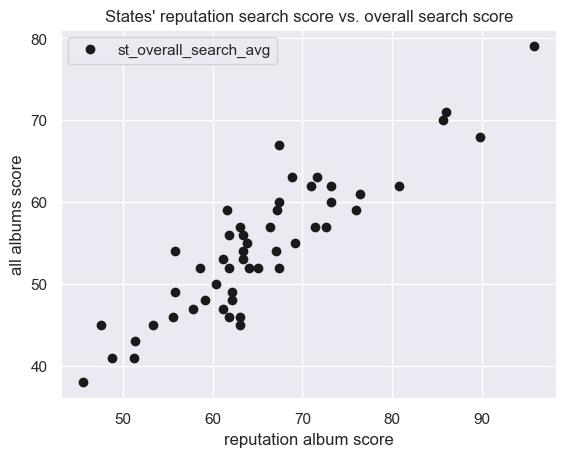

In [104]:
plt.figure(figsize = (12, 9))

rep_avg_st_avg_scat = plt
df_state_scores.plot(x = 'REP_avg_score', y='st_overall_search_avg',color = 'k', style='o') 
rep_avg_st_avg_scat.title("States' reputation search score vs. overall search score")  
rep_avg_st_avg_scat.xlabel("reputation album score")  
rep_avg_st_avg_scat.ylabel("all albums score")  
rep_avg_st_avg_scat.show()


# Export

In [105]:
# Export final album grouped df

df_alb_scores.to_csv(os.path.join(path, '02 Manipulated Data', 'final_album_scores.csv'))

In [106]:
# Export final state grouped df 

df_state_scores.to_csv(os.path.join(path, '02 Manipulated Data', 'final_state_scores.csv'))

In [107]:
# Cleaned up google export

df.to_csv(os.path.join(path, '02 Manipulated Data', 'final_goog_3.csv'))

In [108]:
# Correlation matrix

final_state_scores_corr_matrix.to_csv(os.path.join(path, '02 Manipulated Data', 'final_state_scores_corr_matrix.csv'))